In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as pt
import seaborn as sns

# Data exploration and Cleaning

In [2]:
p=pd.read_csv(r"C:\Users\shiva\Downloads\purchase_data.csv")
u=pd.read_csv(r"C:\Users\shiva\Downloads\user_interactions.csv")
w=pd.read_csv(r"C:\Users\shiva\Downloads\website_performance.csv")

In [3]:
p.columns

Index(['Purchase_ID', 'User_ID', 'Product_ID', 'Transaction_Amount',
       'Purchase_Time'],
      dtype='object')

In [4]:
p.head()

,Purchase_ID,User_ID,Product_ID,Transaction_Amount,Purchase_Time
0,Purchase_948,User_3840,Product_19,62.843031,2023-04-02 16:35:46
1,Purchase_905,User_1846,Product_9,21.780079,2023-04-14 16:38:27
2,Purchase_704,User_1700,Product_8,138.264455,2023-01-21 11:21:31
3,Purchase_766,User_4117,Product_15,74.991367,2023-01-29 04:44:04
4,Purchase_36,User_3053,Product_7,162.569998,2023-05-24 03:30:23


In [5]:
p.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Purchase_ID         1000 non-null   object 
 1   User_ID             1000 non-null   object 
 2   Product_ID          1000 non-null   object 
 3   Transaction_Amount  1000 non-null   float64
 4   Purchase_Time       1000 non-null   object 
dtypes: float64(1), object(4)
memory usage: 39.2+ KB


In [6]:
p.Purchase_Time=pd.to_datetime(p.Purchase_Time)

In [7]:
p.shape

(1000, 5)

In [8]:
p.isnull().any()

Purchase_ID           False
User_ID               False
Product_ID            False
Transaction_Amount    False
Purchase_Time         False
dtype: bool

In [9]:
u.head()

,User_ID,Page_Viewed,Time_Spent_Seconds
0,User_3198,Homepage,560
1,User_126,Category Page,168
2,User_1376,Category Page,122
3,User_1117,Cart Page,329
4,User_3683,Category Page,391


In [10]:
u.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   User_ID             5000 non-null   object
 1   Page_Viewed         5000 non-null   object
 2   Time_Spent_Seconds  5000 non-null   int64 
dtypes: int64(1), object(2)
memory usage: 117.3+ KB


In [11]:
u.isnull().any()

User_ID               False
Page_Viewed           False
Time_Spent_Seconds    False
dtype: bool

In [12]:
u.columns

Index(['User_ID', 'Page_Viewed', 'Time_Spent_Seconds'], dtype='object')

In [13]:
u.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   User_ID             5000 non-null   object
 1   Page_Viewed         5000 non-null   object
 2   Time_Spent_Seconds  5000 non-null   int64 
dtypes: int64(1), object(2)
memory usage: 117.3+ KB


In [14]:
u

,User_ID,Page_Viewed,Time_Spent_Seconds
0,User_3198,Homepage,560
1,User_126,Category Page,168
2,User_1376,Category Page,122
3,User_1117,Cart Page,329
4,User_3683,Category Page,391
...,...,...,...
4995,User_3045,Checkout Page,284
4996,User_1583,Cart Page,322
4997,User_2627,Checkout Page,559
4998,User_4976,Product Page,373


In [15]:
w.head()

,Month,Page_Load_Time,Bounce_Rate,Conversion_Rate
0,2023-01-01,5.106652,0.514345,0.047375
1,2023-02-01,7.828199,0.317157,0.062764
2,2023-03-01,3.239983,0.480903,0.050514
3,2023-04-01,5.954509,0.473572,0.057151
4,2023-05-01,9.872398,0.542407,0.089525


In [16]:
w.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Month            12 non-null     object 
 1   Page_Load_Time   12 non-null     float64
 2   Bounce_Rate      12 non-null     float64
 3   Conversion_Rate  12 non-null     float64
dtypes: float64(3), object(1)
memory usage: 512.0+ bytes


In [17]:
w.isnull().any()

Month              False
Page_Load_Time     False
Bounce_Rate        False
Conversion_Rate    False
dtype: bool

# User behaviour Analysis

In [18]:
most_visited_page=u.Page_Viewed.value_counts()

In [19]:
most_visited_page

Homepage         1045
Cart Page        1041
Checkout Page     989
Category Page     972
Product Page      953
Name: Page_Viewed, dtype: int64

In [20]:
average_Time_perpage=u.groupby(by="Page_Viewed").Time_Spent_Seconds.mean()

In [21]:
average_Time_perpage

Page_Viewed
Cart Page        302.819404
Category Page    297.839506
Checkout Page    306.760364
Homepage         310.215311
Product Page     304.562434
Name: Time_Spent_Seconds, dtype: float64

In [22]:
a=average_Time_perpage.reset_index()

In [23]:
a

,Page_Viewed,Time_Spent_Seconds
0,Cart Page,302.819404
1,Category Page,297.839506
2,Checkout Page,306.760364
3,Homepage,310.215311
4,Product Page,304.562434


# Data visualization

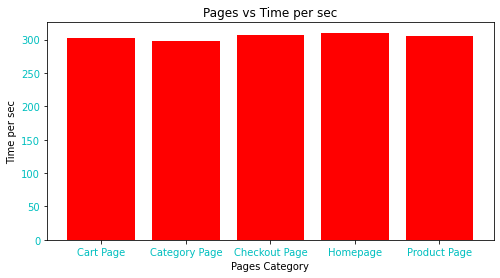

In [24]:
pt.figure(figsize=(8,4))
pt.bar(x=a.Page_Viewed,height=a.Time_Spent_Seconds,color="r")
pt.xlabel("Pages Category")
pt.ylabel("Time per sec")
pt.title("Pages vs Time per sec")
pt.xticks(color="c")
pt.yticks(color="c")
pt.show()


# Click through rate

In [25]:
average_Time_perpage

Page_Viewed
Cart Page        302.819404
Category Page    297.839506
Checkout Page    306.760364
Homepage         310.215311
Product Page     304.562434
Name: Time_Spent_Seconds, dtype: float64

In [26]:
click_through_rate= average_Time_perpage/average_Time_perpage.sum()

In [27]:
click_through_rate

Page_Viewed
Cart Page        0.198936
Category Page    0.195664
Checkout Page    0.201525
Homepage         0.203794
Product Page     0.200081
Name: Time_Spent_Seconds, dtype: float64

# Purchase Analysis

In [28]:
Total_purchase=p.shape[0]
Total_interaction=u.shape[0]

In [29]:
conversion_rate=(Total_purchase/Total_interaction)*100
print(f"Overall Conversion Rate: {conversion_rate:.2f}%")

Overall Conversion Rate: 20.00%


# Top selling products and category

In [30]:
top_selling_products=p.Product_ID.value_counts().nlargest(10)
top_selling_products

Product_19    66
Product_13    59
Product_4     58
Product_20    58
Product_7     56
Product_3     56
Product_17    56
Product_12    55
Product_15    51
Product_5     49
Name: Product_ID, dtype: int64

In [31]:
#we dont have product category column so i am assuming a product category is contained in product id.

In [32]:
p["Product_Category"]=p.Product_ID.str[:3]

In [33]:
top_selling_category=p.Product_Category.value_counts().nlargest(5)

In [34]:
top_selling_category

Pro    1000
Name: Product_Category, dtype: int64

#  Relationship between Interactions and Likelihood of Purchase

In [35]:
merge_pu= u.merge(p,on="User_ID",how="left")

In [36]:
merge_pu.head()

,User_ID,Page_Viewed,Time_Spent_Seconds,Purchase_ID,Product_ID,Transaction_Amount,Purchase_Time,Product_Category
0,User_3198,Homepage,560,NaN,NaN,NaN,NaT,NaN
1,User_126,Category Page,168,NaN,NaN,NaN,NaT,NaN
2,User_1376,Category Page,122,NaN,NaN,NaN,NaT,NaN
3,User_1117,Cart Page,329,NaN,NaN,NaN,NaT,NaN
4,User_3683,Category Page,391,NaN,NaN,NaN,NaT,NaN


In [37]:
total_interaction_per_user=u.groupby(by="User_ID").size().reset_index(name="Total interaction")

In [38]:
total_interaction_per_user.sort_values(by="Total interaction",ascending=False)

,User_ID,Total interaction
2606,User_466,7
2364,User_429,6
1629,User_3278,5
1403,User_2970,5
1457,User_3045,5
...,...,...
1793,User_3501,1
1792,User_350,1
1791,User_3499,1
1789,User_3497,1


In [39]:
Total_purchase_per_user = p.groupby(by="User_ID").size().reset_index(name="Total Purchase")

In [40]:
Total_purchase_per_user.sort_values(by="Total Purchase",ascending=False)

,User_ID,Total Purchase
153,User_1700,3
13,User_1075,3
54,User_1277,3
182,User_1846,3
406,User_3017,3
...,...,...
325,User_2524,1
326,User_2537,1
327,User_2540,1
328,User_2558,1


In [41]:
#Merge the total interactions and total purchases per user
merge_column=total_interaction_per_user.merge(Total_purchase_per_user,on="User_ID",how="left")
merge_column["Total Purchase"].fillna(0,inplace=True)
merge_column["Conversion rate"]=(merge_column["Total Purchase"]/merge_column["Total interaction"])*100
merge_column
print(merge_column.head())



     User_ID  Total interaction  Total Purchase  Conversion rate
0     User_1                  2             0.0              0.0
1   User_100                  1             0.0              0.0
2  User_1000                  1             1.0            100.0
3  User_1002                  1             0.0              0.0
4  User_1004                  1             0.0              0.0


# Data Visualization

In [42]:
x=merge_column["Total interaction"]
y=merge_column["Total Purchase"]

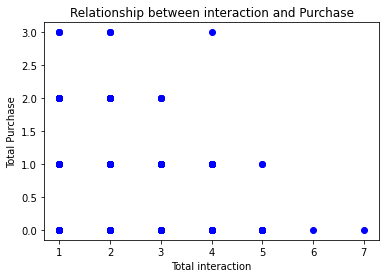

In [43]:
pt.scatter(x,y,color="b")
pt.title("Relationship between interaction and Purchase")
pt.xlabel("Total interaction")
pt.ylabel("Total Purchase")
pt.show()

# Cohort Analysis

In [44]:
user=pd.read_csv(r"C:\Users\shiva\Downloads\user_interactions.csv")
## Convert the 'Time_spent' to a datetime format
user["Time_Spent_Seconds"]=pd.to_datetime(user.Time_Spent_Seconds)
## Find the first interaction date for each user
first_interaction=user.groupby(by="User_ID")["Time_Spent_Seconds"].min().reset_index()
first_interaction.rename(columns={"Time_Spent_Seconds":"First interaction"},inplace=True)
# Merge the first interaction date back to the u (u stand for user interaction data variable)
user=user.merge(first_interaction,on="User_ID",how="left")
user["Time Period"]=(user["Time_Spent_Seconds"]-user["First interaction"])

In [45]:
user.columns

Index(['User_ID', 'Page_Viewed', 'Time_Spent_Seconds', 'First interaction',
       'Time Period'],
      dtype='object')

In [46]:
cohort_metric=user.groupby(["First interaction" ,"Time Period"])["Time_Spent_Seconds"].mean().reset_index()
cohort_metric

,First interaction,Time Period,Time_Spent_Seconds
0,1970-01-01 00:00:00.000000010,0 days 00:00:00,1970-01-01 00:00:00.000000010
1,1970-01-01 00:00:00.000000010,0 days 00:00:00.000000024,1970-01-01 00:00:00.000000034
2,1970-01-01 00:00:00.000000010,0 days 00:00:00.000000089,1970-01-01 00:00:00.000000099
3,1970-01-01 00:00:00.000000010,0 days 00:00:00.000000104,1970-01-01 00:00:00.000000114
4,1970-01-01 00:00:00.000000010,0 days 00:00:00.000000151,1970-01-01 00:00:00.000000161
...,...,...,...
2364,1970-01-01 00:00:00.000000595,0 days 00:00:00,1970-01-01 00:00:00.000000595
2365,1970-01-01 00:00:00.000000596,0 days 00:00:00,1970-01-01 00:00:00.000000596
2366,1970-01-01 00:00:00.000000597,0 days 00:00:00,1970-01-01 00:00:00.000000597
2367,1970-01-01 00:00:00.000000598,0 days 00:00:00,1970-01-01 00:00:00.000000598


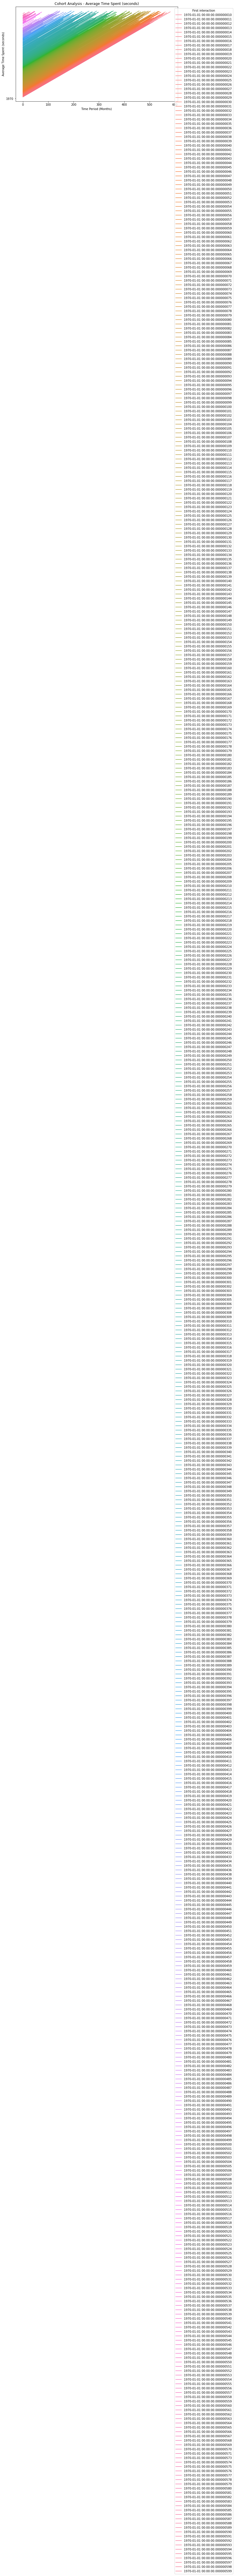

In [47]:
cohort_pivot = cohort_metric.pivot_table(index="First interaction", columns="Time Period", values="Time_Spent_Seconds")
pt.figure(figsize=(10, 6))
sns.lineplot(data=cohort_metric, x='Time Period', y='Time_Spent_Seconds', hue='First interaction')
pt.title('Cohort Analysis - Average Time Spent (seconds)')
pt.xlabel('Time Period (Months)')
pt.ylabel('Average Time Spent (seconds)')
pt.legend(title='First interaction', loc='upper right', bbox_to_anchor=(1.35, 1))
pt.show()

# Website Performance Optimization

In [49]:
website=pd.read_csv(r"C:\Users\shiva\Downloads\website_performance.csv")

In [50]:
# Calculate the overall bounce rate and conversion rate:
overall_bounce_rate=website["Bounce_Rate"].mean()
overall_bounce_rate=website["Conversion_Rate"].mean()

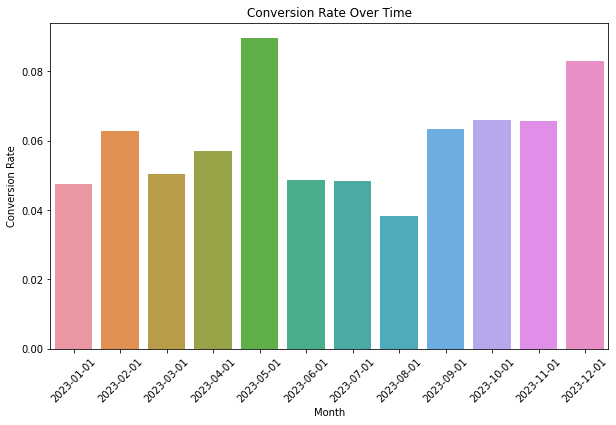

In [51]:
pt.figure(figsize=(10, 6))
sns.barplot(data=website, x='Month', y='Conversion_Rate')
pt.title('Conversion Rate Over Time')
pt.xlabel('Month')
pt.ylabel('Conversion Rate')
pt.xticks(rotation=45)
pt.show()